In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import statsmodels.api as sm

In [46]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [47]:
df = pd.read_excel('train.xlsx')
 

In [48]:
df.head()

,Data,Accepted/Rejected
0,\n\nHuman: Do you think if anything is possib...,Accepted
1,\n\nHuman: . Do you think if anything is possi...,Accepted
2,\n\nHuman: . Do you think if anything is possi...,Accepted
3,\n\nHuman: . Do you think if anything is possi...,Accepted
4,\n\nHuman: . Do you think if anything is possi...,Accepted


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
df['Accepted/Rejected'] = encoder.fit_transform(df['Accepted/Rejected'])

In [51]:
df.head()

,Data,Accepted/Rejected
0,\n\nHuman: Do you think if anything is possib...,0
1,\n\nHuman: . Do you think if anything is possi...,0
2,\n\nHuman: . Do you think if anything is possi...,0
3,\n\nHuman: . Do you think if anything is possi...,0
4,\n\nHuman: . Do you think if anything is possi...,0


In [52]:
df.isnull().sum()

Data                 0
Accepted/Rejected    0
dtype: int64

In [53]:
df.duplicated().sum()

3

In [54]:
df = df.drop_duplicates()

In [55]:
df.duplicated().sum()

0

In [56]:
df.shape

(85071, 2)

EDA

In [57]:
df['Accepted/Rejected'].value_counts()

1    42537
0    42534
Name: Accepted/Rejected, dtype: int64

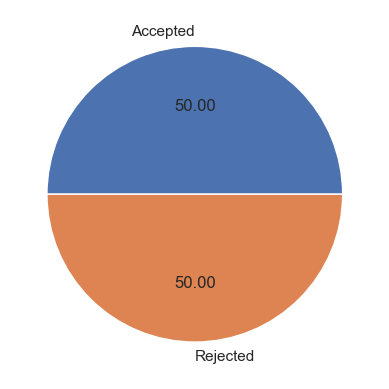

In [58]:
import matplotlib.pyplot as plt
plt.pie(df['Accepted/Rejected'].value_counts(), labels=['Accepted','Rejected'],autopct="%0.2f")
plt.show()

In [59]:
import nltk

In [60]:
!pip install nltk

In [61]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [62]:

nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [63]:
df['num_characters'] = df['Data'].apply(len)

In [64]:
df.head()

,Data,Accepted/Rejected,num_characters
0,\n\nHuman: Do you think if anything is possib...,0,1053
1,\n\nHuman: . Do you think if anything is possi...,0,927
2,\n\nHuman: . Do you think if anything is possi...,0,1145
3,\n\nHuman: . Do you think if anything is possi...,0,525
4,\n\nHuman: . Do you think if anything is possi...,0,900


In [65]:
df['num_words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x)))

In [66]:
df.head()

,Data,Accepted/Rejected,num_characters,num_words
0,\n\nHuman: Do you think if anything is possib...,0,1053,217
1,\n\nHuman: . Do you think if anything is possi...,0,927,194
2,\n\nHuman: . Do you think if anything is possi...,0,1145,238
3,\n\nHuman: . Do you think if anything is possi...,0,525,106
4,\n\nHuman: . Do you think if anything is possi...,0,900,182


In [67]:
df['num_sentences'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [68]:
df.head()

,Data,Accepted/Rejected,num_characters,num_words,num_sentences
0,\n\nHuman: Do you think if anything is possib...,0,1053,217,10
1,\n\nHuman: . Do you think if anything is possi...,0,927,194,10
2,\n\nHuman: . Do you think if anything is possi...,0,1145,238,11
3,\n\nHuman: . Do you think if anything is possi...,0,525,106,6
4,\n\nHuman: . Do you think if anything is possi...,0,900,182,9


In [69]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,85071.000000,85071.000000,85071.000000
mean,652.655899,140.180532,8.430734
std,539.855841,113.168087,6.292132
min,27.000000,6.000000,1.000000
25%,267.000000,59.000000,4.000000
50%,502.000000,110.000000,7.000000
75%,869.000000,187.000000,11.000000
max,4603.000000,1099.000000,99.000000


In [70]:
df[df['Accepted/Rejected'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,42534.000000,42534.000000,42534.000000
mean,626.237034,135.430338,8.290262
std,510.884293,107.933961,6.085517
min,27.000000,6.000000,1.000000
25%,263.000000,58.000000,4.000000
50%,484.000000,106.000000,7.000000
75%,830.000000,180.000000,11.000000
max,4228.000000,1099.000000,62.000000


In [71]:
df[df['Accepted/Rejected'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,42537.000000,42537.000000,42537.000000
mean,679.072901,144.930390,8.571197
std,566.122605,117.980448,6.489192
min,32.000000,7.000000,1.000000
25%,273.000000,59.000000,4.000000
50%,523.000000,113.000000,7.000000
75%,910.000000,195.000000,12.000000
max,4603.000000,928.000000,99.000000


In [72]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

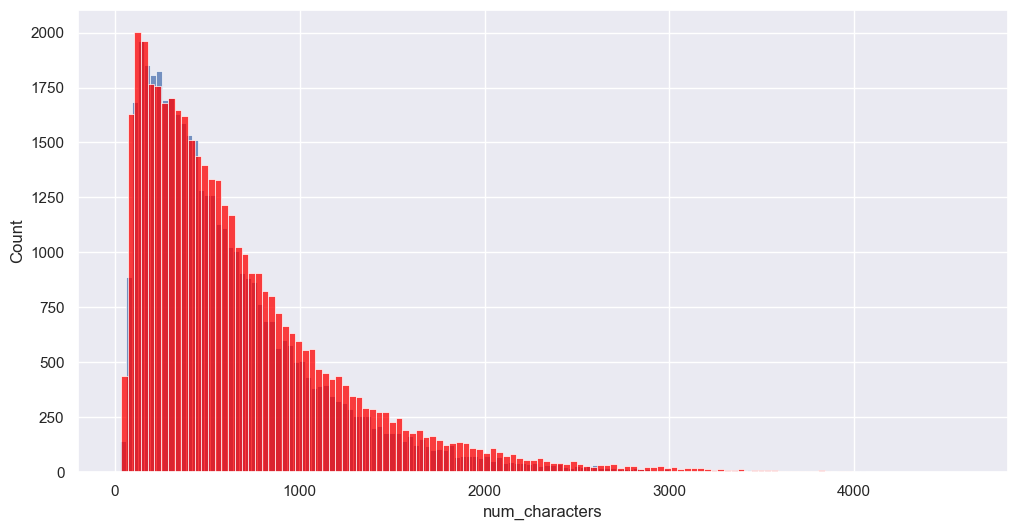

In [73]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Accepted/Rejected'] == 0]['num_characters'])
sns.histplot(df[df['Accepted/Rejected'] == 1]['num_characters'],color='red')

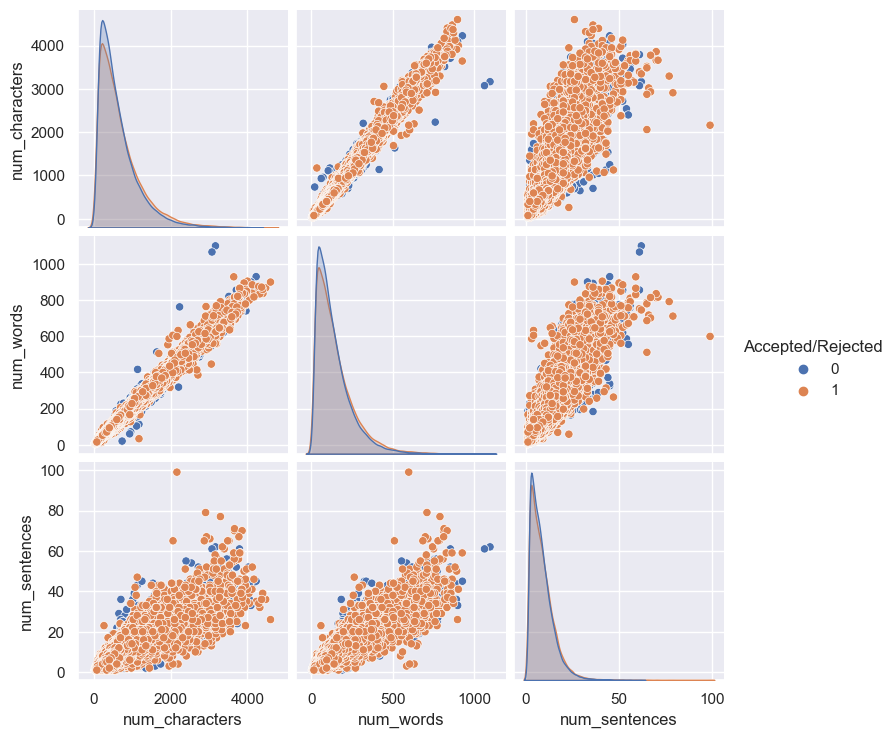

In [74]:
sns.pairplot(df,hue='Accepted/Rejected')

C:\Users\91949\AppData\Local\Temp\ipykernel_6772\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

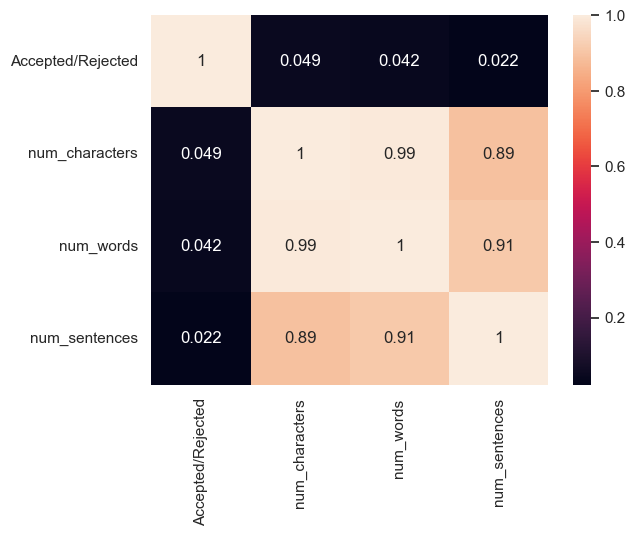

In [75]:
sns.heatmap(df.corr(),annot=True)

In [78]:
df.head()

,Data,Accepted/Rejected,num_characters,num_words,num_sentences
0,\n\nHuman: Do you think if anything is possib...,0,1053,217,10
1,\n\nHuman: . Do you think if anything is possi...,0,927,194,10
2,\n\nHuman: . Do you think if anything is possi...,0,1145,238,11
3,\n\nHuman: . Do you think if anything is possi...,0,525,106,6
4,\n\nHuman: . Do you think if anything is possi...,0,900,182,9


In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
X = tfidf.fit_transform(df['Data']).toarray()

In [81]:
X.shape


(85071, 3000)

In [82]:
 y= df['Accepted/Rejected'].values

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [87]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6682926829268293
[[5700 2883]
 [2761 5671]]
0.6629646948795885


In [88]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.6905083749632677
[[5715 2868]
 [2398 6034]]
0.6778252078184678


In [89]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6677637378783426
[[6210 2373]
 [3280 5152]]
0.6846511627906977


In [92]:
!pip install xgboost
import xgboost

     ---------------------------------------- 99.8/99.8 MB 3.6 MB/s eta 0:00:00


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [95]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)